In [1]:
import os
import lime
import shap
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Create a folder for explanations
os.makedirs("explanations", exist_ok=True)

In [3]:
folder_path = "train_test_pickles"

all_shap_values = []
features = []
for idx in range(20):
    print(f"Processing iteration {idx}")
    
    train_pickle_path = os.path.join(folder_path, f"train_df_{idx}.pickle")
    test_pickle_path = os.path.join(folder_path, f"test_df_{idx}.pickle")

    train_df = pd.read_pickle(train_pickle_path)
    test_df = pd.read_pickle(test_pickle_path)

    cols_dropped = ['date', 'last_rtt', 'prb_id', 'dst_id', 'normalizzed_rtt', 'src_names', 'distance', 'Latitude_source', 'Longitude_source', 'Latitude_destination', 'Longitude_destination', 'Public_destination', 'Public_source', 'norm_storedtimestamp']

    X_train = train_df.drop(columns=cols_dropped, axis=1)
    y_train = train_df['normalizzed_rtt']

    X_test = test_df.drop(columns=cols_dropped, axis=1)
    y_test = test_df['normalizzed_rtt']


    rand_forest = RandomForestRegressor(
        n_estimators=10,
        criterion='squared_error',
        random_state=42,
    )

    rand_forest.fit(X_train, y_train)

    #lime explainer
    explainer_lime = LimeTabularExplainer(training_data=X_train.values, mode="regression", feature_names=X_train.columns)
    instance_idx = 0
    instance_to_explain = X_train.iloc[[instance_idx]]
    explanation_lime = explainer_lime.explain_instance(instance_to_explain.values[0], rand_forest.predict)
    lime_diagram_path = f"explanations/lime_diagram_{idx}.png"
    explanation_lime.as_pyplot_figure().savefig(lime_diagram_path, bbox_inches='tight')
    plt.clf()
    
    #shape explainer
    explainer_shap = shap.Explainer(rand_forest)
    shap_values = explainer_shap(X_train[:10000])
    # Append SHAP values to the list
    features = X_train.columns
    all_shap_values.append(shap_values.values)
    shap_diagram_path = f"explanations/shap_diagram_{idx}.png"
    shap.summary_plot(shap_values, X_train[:10000], plot_type="bar",show=False)
    plt.savefig(shap_diagram_path)
    plt.clf()

Processing iteration 0


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 1


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 2


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 3


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 4


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 5


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 6


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 7


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 8


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 9


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 10


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 11


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 12


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 13


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 14


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 15


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 16


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 17


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 18


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Processing iteration 19


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

<Figure size 800x950 with 0 Axes>

In [4]:
shap_df = pd.DataFrame(np.concatenate(all_shap_values), columns=features)

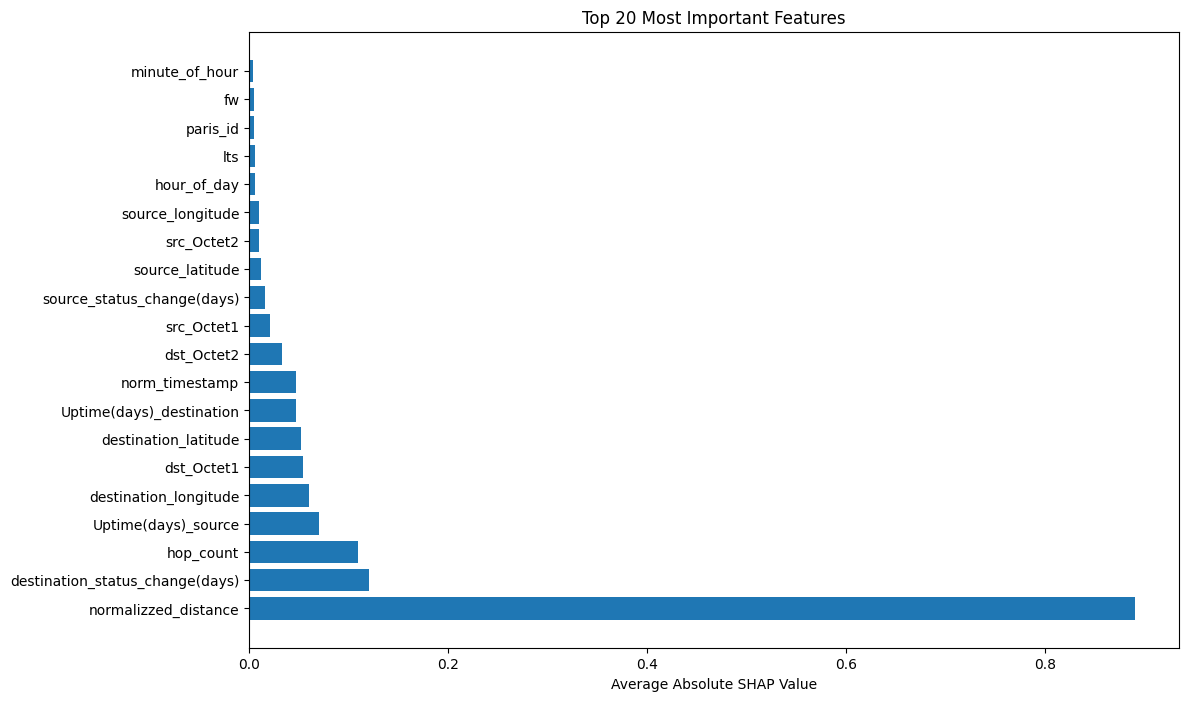

In [5]:
# Calculate the average absolute SHAP values for each feature
average_shap_values = np.abs(shap_df).mean()

# Get the top 20 features based on average absolute SHAP values
top_features_idx = average_shap_values.argsort()[-20:][::-1]

# Plot the average absolute SHAP values for the top 20 features
plt.figure(figsize=(12, 8))
plt.barh(range(20), average_shap_values[top_features_idx], align='center')
plt.yticks(range(20), features[top_features_idx])
plt.xlabel('Average Absolute SHAP Value')
plt.title('Top 20 Most Important Features')
plt.show()